In [12]:
import sqlite3 as sql3
import matplotlib.pyplot as plt

In [13]:
class geracoes:
    def __init__(self):
        
        conexao = sql3.connect('../../database/Pokemon.db')
        self.cursor = conexao.cursor()
        self.geracoes= self.cursor.execute('SELECT count(id) FROM generation;').fetchone()[0];
    def gens(self):
        qtd = self.cursor.execute('SELECT COUNT(*) FROM pokemon').fetchone()[0]  # Fetch count value properly
        pk_generacion = []

        for x in range(1, 7):
            # Count the number of Pokémon for each generation
            linha = self.cursor.execute("SELECT COUNT(*) FROM pokemon WHERE Generation = ?", (x,)).fetchone()

            if linha:  # Verifica se há algum resultado
                # Calculate the percentage of Pokémon in this generation
                porcentagem = (linha[0] / qtd) * 100
                pk_generacion.append(porcentagem)

        return pk_generacion
    def lendarios(self):
        lend_generacion = []
        qtd = self.cursor.execute('SELECT COUNT(*) FROM pokemon WHERE Legendary == TRUE;').fetchone()[0]  # Fetch count value properly
        for x in range(self.geracoes+1):
            # Executa a consulta SQL e calcula a porcentagem
            linha = self.cursor.execute(f"SELECT COUNT(*) LENGENDARYS FROM pokemon WHERE Generation=={x} and Legendary==TRUE").fetchone()[0]
            if linha:  # Verifica se há algum resultado
                # Calcula a porcentagem do valor POKEMONS
                porcentagem = (linha / qtd) * 100
                lend_generacion.append(porcentagem)  # Adiciona a porcentagem à lista
        return lend_generacion
    def lends_per_genertion(self):
        lista=[]
        for x in range(1,self.geracoes+1):
            linha = self.cursor.execute(f"SELECT COUNT(*) FROM pokemon WHERE Generation=={x};").fetchone()[0]
            qtd = self.cursor.execute(f"SELECT COUNT(*) FROM pokemon WHERE Legendary == TRUE and generation=={x};").fetchone()[0]
            lista.append((qtd/linha)*100)
        return lista

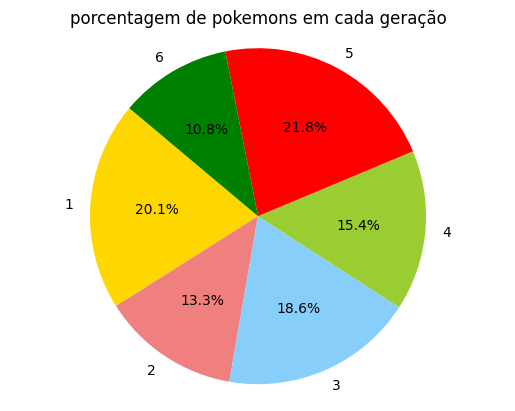

In [14]:
geracao=geracoes()
labels = ['1', '2', '3', '4','5','6']
sizes = [x for x in geracao.gens()]  # Porcentagens
colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen','red','green']  # Cores para cada fatia

# Criando o gráfico de pizza
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('porcentagem de pokemons em cada geração')
# Igualando o aspecto do gráfico para que ele fique redondo
plt.axis('equal')

# Exibindo o gráfico
plt.show()

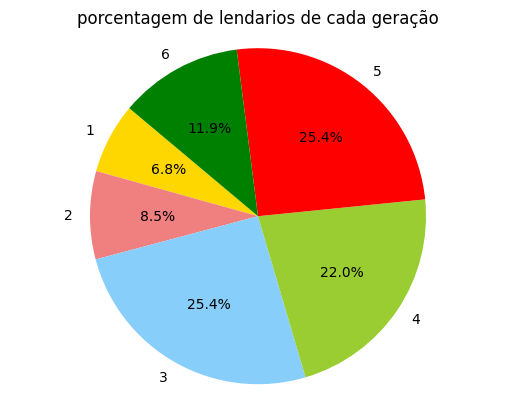

In [19]:
labels = ['1', '2', '3', '4','5','6']
sizes = [x for x in geracao.lendarios()]  # Porcentagens
colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen','red','green']  # Cores para cada fatia

# Criando o gráfico de pizza
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('porcentagem de lendarios de cada geração')
# Igualando o aspecto do gráfico para que ele fique redondo
plt.axis('equal')

# Exibindo o gráfico
plt.show()

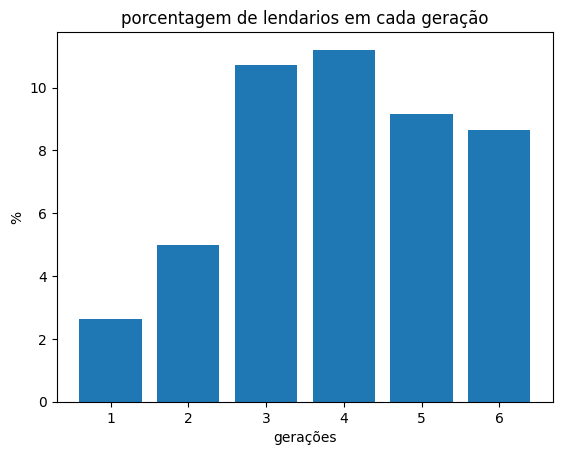

In [18]:
consulta=geracao.lends_per_genertion()
categorias = [for x in range(1,len(consulta+1))]

# Criar gráfico de barras
plt.bar(categorias, consulta)

# Títulos e rótulos
plt.title('porcentagem de lendarios em cada geração')
plt.xlabel('gerações')
plt.ylabel('%')

# Mostrar gráfico
plt.show()